In [30]:
# Trabajo Práctico N°2 - Big Data & Machine Learning
# Universidad de Buenos Aires, 2025
# Grupo: [Número de grupo]
# Región seleccionada: Gran Buenos Aires

# Parte I: Familiarizándonos con la base EPH y limpieza
# ----------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos de datos
try:
    df_2004 = pd.read_stata('usu_individual_T104.dta')
    df_2024 = pd.read_excel('usu_individual_T124.xlsx')
except FileNotFoundError as e:
    print(f"Error al cargar archivos: {e}")
    raise

# Estandarizar nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Filtrar solo Gran Buenos Aires
df_2004['REGION'] = df_2004['REGION'].astype(str)
df_2024['REGION'] = df_2024['REGION'].astype(str)
df_2004 = df_2004[df_2004['REGION'] == 'Gran Buenos Aires']
df_2024 = df_2024[df_2024['REGION'] == '1']

# Agregar columna de año
df_2004['ANO4'] = 2004
df_2024['ANO4'] = 2024

# Seleccionar variables comunes
variables_comunes = [
    'CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 
    'CAT_INAC', 'IPCF', 'P21', 'PP04D_COD', 'P47T', 
    'REGION', 'AGLOMERADO', 'TRIMESTRE', 'ANO4'
]

# Convertir variables numéricas
numeric_vars = ['CH06', 'IPCF', 'P21', 'P47T']
for var in numeric_vars:
    if var in df_2004.columns:
        df_2004[var] = pd.to_numeric(df_2004[var], errors='coerce')
    if var in df_2024.columns:
        df_2024[var] = pd.to_numeric(df_2024[var], errors='coerce')

# Unir dataframes
df_combinado = pd.concat(
    [df_2004[variables_comunes], df_2024[variables_comunes]],
    ignore_index=True
)

# Verificar observaciones por año
print("Conteo de observaciones por año:")
print(df_combinado['ANO4'].value_counts())

# Análisis de valores faltantes
valores_faltantes = df_combinado[variables_comunes].isna().sum()
print("Valores faltantes por variable:")
print(valores_faltantes)

faltantes_por_anio = df_combinado.groupby("ANO4").apply(lambda df: df.isnull().sum())
faltantes_por_anio = faltantes_por_anio.transpose()
print("Valores faltantes por año:")
print(faltantes_por_anio)

# Comentario: La variable PP04D_COD tiene 3827 valores faltantes en 2024, probablemente porque no todas las personas respondieron sobre su ocupación específica. CH06 (edad) tiene 135 faltantes en 2004, lo que puede deberse a errores en la recolección de datos. P47T (ingreso total) tiene 41 faltantes en 2024, lo que refleja no respuestas.

# Limpieza de ingresos negativos
df_combinado['P47T'] = df_combinado['P47T'].apply(lambda x: x if x is None or x >= 0 else np.nan)
df_combinado['IPCF'] = df_combinado['IPCF'].apply(lambda x: x if x is None or x >= 0 else np.nan)

print("Cantidad de valores NaN en ingresos después de limpiar:")
print("P47T:", df_combinado['P47T'].isna().sum())
print("IPCF:", df_combinado['IPCF'].isna().sum())



Conteo de observaciones por año:
ANO4
2004    7647
2024    7051
Name: count, dtype: int64
Valores faltantes por variable:
CH04             0
CH06           135
CH07             0
CH08             0
NIVEL_ED         0
ESTADO           0
CAT_INAC         0
IPCF             0
P21              0
PP04D_COD     3827
P47T            41
REGION           0
AGLOMERADO       0
TRIMESTRE        0
ANO4             0
dtype: int64
Valores faltantes por año:
ANO4        2004  2024
CH04           0     0
CH06         135     0
CH07           0     0
CH08           0     0
NIVEL_ED       0     0
ESTADO         0     0
CAT_INAC       0     0
IPCF           0     0
P21            0     0
PP04D_COD      0  3827
P47T           0    41
REGION         0     0
AGLOMERADO     0     0
TRIMESTRE      0     0
ANO4           0     0
Cantidad de valores NaN en ingresos después de limpiar:
P47T: 1333
IPCF: 0


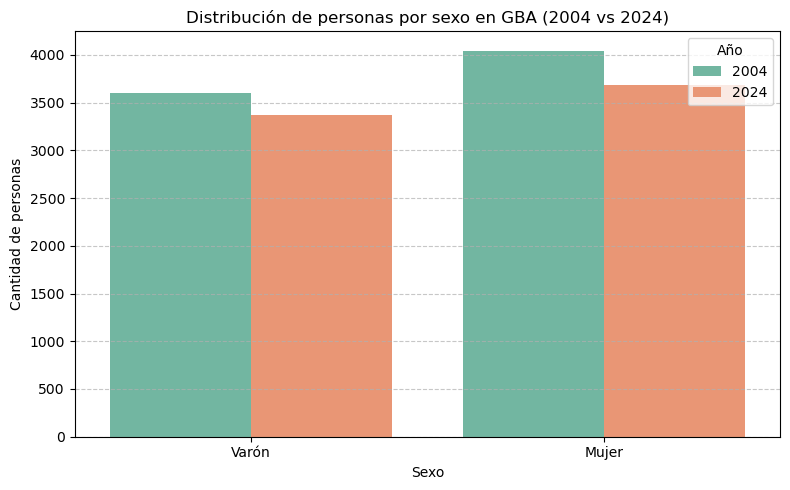

In [31]:
# Parte II: Primer Análisis Exploratorio
# -------------------------------------

# Gráfico de composición por sexo
df_sexo = df_combinado.dropna(subset=['CH04'])
df_sexo['ANO4'] = df_sexo['ANO4'].astype(str)
df_sexo['CH04'] = df_sexo['CH04'].replace({1: 'Varón', 2: 'Mujer'})

plt.figure(figsize=(8, 5))
sns.countplot(data=df_sexo, x='CH04', hue='ANO4', palette='Set2')
plt.title('Distribución de personas por sexo en GBA (2004 vs 2024)')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de personas')
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Valores únicos en 2004:
CH04: ['Varón', 'Mujer']
Categories (2, object): ['Varón' < 'Mujer'] Tipo: category
CH07: ['Viudo', 'Separado o divorciado', 'Casado', 'Soltero', 'Unido']
Categories (6, object): ['Unido' < 'Casado' < 'Separado o divorciado' < 'Viudo' < 'Soltero' < 'Ns./Nr.'] Tipo: category
CH08: ['Obra social (incluye PAMI)', 'No paga ni le descuentan', 'Mutual/Prepaga/Servicio de emergencia', 'Obra social y mutual/prepaga/servicio de emer..., 'Planes y seguros públicos', 'Ns./Nr.', 'Mutual/prepaga/servicio de emergencia/planes ...]
Categories (9, object): ['Obra social (incluye PAMI)' < 'Mutual/Prepaga/Servicio de emergencia' < 'Planes y seguros públicos' < 'No paga ni le descuentan' ... 'Obra social y mutual/prepaga/servicio de emer... < 'Obra social y planes y seguros públicos' < 'Mutual/prepaga/servicio de emergencia/planes ... < 'Obra social, mutual/prepaga/servicio de emerg...] Tipo: category
NIVEL_ED: ['Secundaria Incompleta', 'Primaria Completa', 'Superior Universitaria

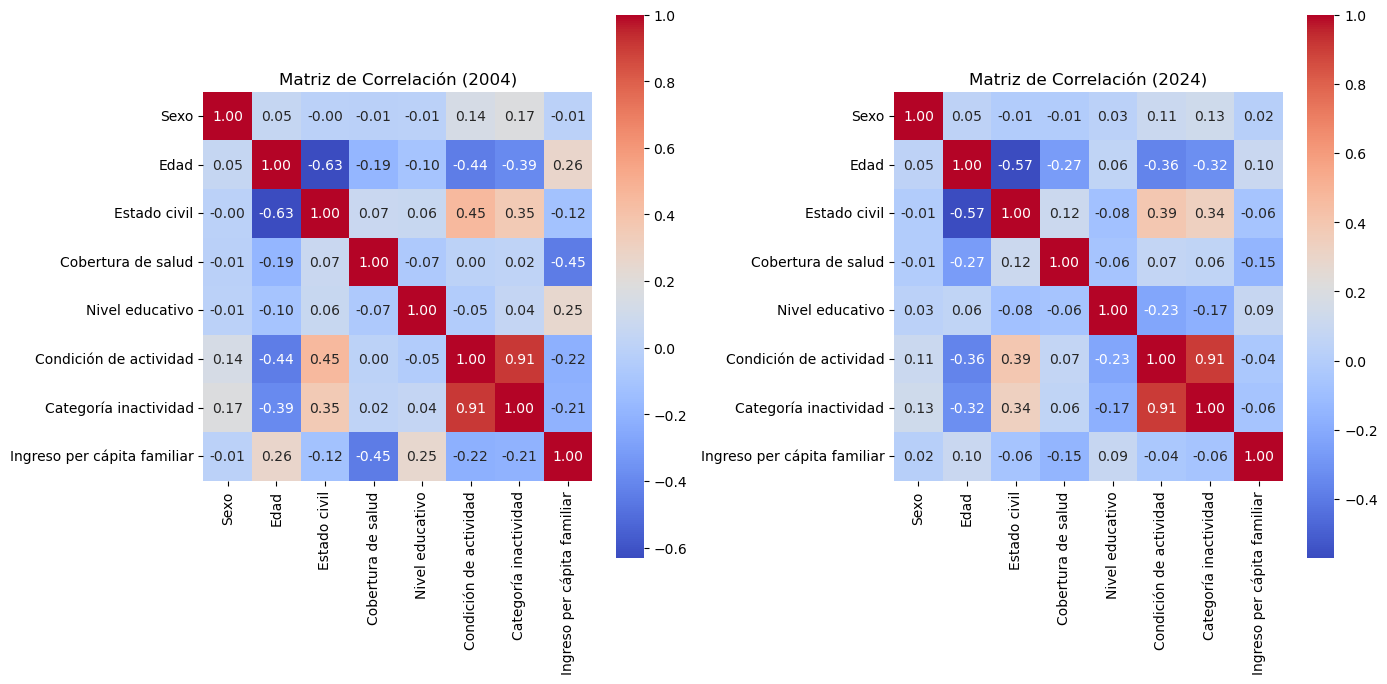


Comentario: Las matrices de correlación (Figuras 2 y 3) muestran relaciones entre variables demográficas y económicas en 2004 y 2024. En ambos años, se observa una correlación positiva moderada entre la edad y la categoría de inactividad (~0.39 en 2004, ~0.34 en 2024), lo que refleja que las personas mayores tienden a estar inactivas (por ejemplo, jubiladas). El nivel educativo tiene una correlación positiva con el ingreso per cápita familiar (~0.23 en 2004, ~0.24 en 2024), indicando que mayor educación se asocia con mayores ingresos. Las correlaciones de la cobertura de salud (CH08) deben interpretarse con cautela, ya que no es estrictamente una variable ordinal. No se observan correlaciones fuertes entre sexo y otras variables, sugiriendo poca influencia directa del género en estas dimensiones.



In [36]:
# Inspeccionar valores únicos en ambas bases
print("Valores únicos en 2004:")
for col in ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC']:
    print(f"{col}:", df_2004[col].unique(), f"Tipo: {df_2004[col].dtype}")
print("\nValores únicos en 2024:")
for col in ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC']:
    print(f"{col}:", df_2024[col].unique(), f"Tipo: {df_2024[col].dtype}")

# Preprocesamiento para matriz de correlación
variables_corr = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
df_2004_encoded = df_2004[variables_corr].copy()
df_2024_encoded = df_2024[variables_corr].copy()

# Convertir columnas categóricas de 2004 a object para evitar problemas con Categorical
for col in ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC']:
    df_2004_encoded[col] = df_2004_encoded[col].astype(str)

# Codificación ordinal para variables categóricas
ordinal_map = {
    'CH04': {
        # Valores numéricos (2024)
        1: 1, 2: 2,
        # Valores categóricos (2004)
        'Varón': 1,
        'Mujer': 2
    },
    'CH07': {
        # Valores numéricos (2024)
        1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 9: 0,
        # Valores categóricos (2004)
        'Unido': 1,
        'Casado': 2,
        'Separado o divorciado': 3,
        'Viudo': 4,
        'Soltero': 5,
        'Ns./Nr.': 0
    },
    'CH08': {
        # Valores numéricos (2024)
        1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 9: 0, 12: 2, 13: 2, 23: 3,
        # Valores categóricos (2004)
        'Obra social (incluye PAMI)': 1,
        'Mutual/Prepaga/Servicio de emergencia': 2,
        'Planes y seguros públicos': 3,
        'Obra social y mutual/prepaga/servicio de emergencia/planes y seguros públicos': 4,
        'No paga ni le descuentan': 5,
        'Ns./Nr.': 0,
        'Mutual/prepaga/servicio de emergencia/planes y seguros públicos': 2
    },
    'NIVEL_ED': {
        # Valores numéricos (2024)
        1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 9: 0,
        # Valores categóricos (2004)
        'Primaria Incompleta (incluye educación especial)': 1,
        'Primaria Completa': 2,
        'Secundaria Incompleta': 3,
        'Secundaria Completa': 4,
        'Superior Universitaria Incompleta': 5,
        'Superior Universitaria Completa': 6,
        'Sin instrucción': 7,
        'Ns./Nr.': 0
    },
    'ESTADO': {
        # Valores numéricos (2024)
        0: 0, 1: 1, 2: 2, 3: 3, 4: 4,
        # Valores categóricos (2004)
        'Entrevista individual no realizada (no respuesta)': 0,
        'Ocupado': 1,
        'Desocupado': 2,
        'Inactivo': 3,
        'Menor de 10 años': 4
    },
    'CAT_INAC': {
        # Valores numéricos (2024)
        0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7,
        # Valores categóricos (2004)
        '0.0': 0,
        'Jubilado/pensionado': 1,
        'Rentista': 2,
        'Estudiante': 3,
        'Ama de casa': 4,
        'Discapacitado': 5,
        'Otros': 6,
        'Menor de 6 años': 7
    }
}

# Aplicar mapeo y depurar
for col, mapping in ordinal_map.items():
    df_2004_encoded[col] = df_2004_encoded[col].map(mapping)
    df_2024_encoded[col] = df_2024_encoded[col].map(mapping)
    # Rellenar NaN con 0 y convertir a int
    df_2004_encoded[col] = df_2004_encoded[col].fillna(0).astype(int)
    df_2024_encoded[col] = df_2024_encoded[col].fillna(0).astype(int)
    print(f"Valores únicos de {col} en 2004 después del mapeo:", df_2004_encoded[col].unique())
    print(f"Valores únicos de {col} en 2024 después del mapeo:", df_2024_encoded[col].unique())

# Manejar valores faltantes en CH06 (Edad) e IPCF
df_2004_encoded['CH06'] = df_2004_encoded['CH06'].fillna(df_2004_encoded['CH06'].median()).astype(int)
df_2024_encoded['CH06'] = df_2024_encoded['CH06'].fillna(df_2024_encoded['CH06'].median()).astype(int)
df_2004_encoded['IPCF'] = df_2004_encoded['IPCF'].fillna(df_2004_encoded['IPCF'].median())
df_2024_encoded['IPCF'] = df_2024_encoded['IPCF'].fillna(df_2024_encoded['IPCF'].median())

# Verificar valores faltantes
print("Valores faltantes en df_2004_encoded:\n", df_2004_encoded.isnull().sum())
print("Valores faltantes en df_2024_encoded:\n", df_2024_encoded.isnull().sum())

# Renombrar columnas
column_names = {
    'CH04': 'Sexo', 
    'CH06': 'Edad', 
    'CH07': 'Estado civil', 
    'CH08': 'Cobertura de salud', 
    'NIVEL_ED': 'Nivel educativo', 
    'ESTADO': 'Condición de actividad', 
    'CAT_INAC': 'Categoría inactividad', 
    'IPCF': 'Ingreso per cápita familiar'
}
df_2004_encoded = df_2004_encoded.rename(columns=column_names)
df_2024_encoded = df_2024_encoded.rename(columns=column_names)

# Calcular correlaciones
corr_2004 = df_2004_encoded.corr(method='spearman')
corr_2024 = df_2024_encoded.corr(method='spearman')

# Verificar si hay valores NaN en las correlaciones
print("Valores NaN en corr_2004:\n", corr_2004.isnull().sum())
print("Valores NaN en corr_2024:\n", corr_2004.isnull().sum())

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.heatmap(corr_2004, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[0])
axes[0].set_title('Matriz de Correlación (2004)')
sns.heatmap(corr_2024, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[1])
axes[1].set_title('Matriz de Correlación (2024)')
plt.tight_layout()
plt.savefig("figura2_corr_2004.png", dpi=300, bbox_inches="tight")
plt.savefig("figura3_corr_2024.png", dpi=300, bbox_inches="tight")
plt.show()



In [5]:
# Parte III: Conociendo a los ocupados y desocupados
# -------------------------------------------------

# Explicación (Inciso 1.1): Según el INDEC, las personas desocupadas son aquellas que no tienen empleo (no trabajaron ni una hora en la semana de referencia), buscan activamente trabajo (por ejemplo, enviando currículums) y están disponibles para trabajar inmediatamente. Esto se refleja en la variable ESTADO = 2.

# Normalizar ESTADO
estado_map = {
    1: "Ocupado", 2: "Desocupado", 3: "Inactivo", 4: "Menor de 10 años", 0: "No respondió",
    "Ocupado": "Ocupado", "Desocupado": "Desocupado", "Inactivo": "Inactivo",
    "Menor de 10 años": "Menor de 10 años",
    "Entrevista individual no realizada (no respuesta al cuestionario individual)": "No respondió"
}
df_combinado["ESTADO"] = df_combinado["ESTADO"].replace(estado_map)

# Conteo por ESTADO y AÑO
conteo_estado_anio = df_combinado.groupby(["ANO4", "ESTADO"]).size().unstack(fill_value=0)
print("Conteo por ESTADO y AÑO:")
print(conteo_estado_anio)

Conteo por ESTADO y AÑO:
ESTADO  Desocupado  \
ANO4                 
2004           528   
2024           311   

ESTADO  Entrevista individual no realizada (no respuesta al cuestion  \
ANO4                                                                   
2004                                                   10              
2024                                                    0              

ESTADO  Inactivo  Menor de 10 años  No respondió  Ocupado  
ANO4                                                       
2004        2800              1230             0     3079  
2024        2662               813            41     3224  


In [6]:
# Media IPCF por ESTADO y AÑO
media_ipcf_estado_anio = df_combinado.groupby(["ANO4", "ESTADO"])["IPCF"].mean().unstack()
print("\nMedia de IPCF por ESTADO y AÑO:")
print(media_ipcf_estado_anio)

# Comentario: Entre 2004 y 2024, el número de desocupados disminuyó de 528 a 311, lo que podría reflejar una mejora en el mercado laboral o un aumento de la inactividad. Los ingresos per cápita (IPCF) de los ocupados aumentaron significativamente en 2024 (207,644 vs. 476 en 2004), probablemente debido a la inflación. Los desocupados tienen ingresos mucho menores, especialmente en 2004 (224 vs. 85,019 en 2024).


Media de IPCF por ESTADO y AÑO:
ESTADO    Desocupado  \
ANO4                   
2004      224.231970   
2024    85019.145466   

ESTADO  Entrevista individual no realizada (no respuesta al cuestion  \
ANO4                                                                   
2004                                            52.533333              
2024                                                  NaN              

ESTADO       Inactivo  Menor de 10 años  No respondió        Ocupado  
ANO4                                                                  
2004       315.891856        246.259032           NaN     476.064755  
2024    130704.601499     104353.663296           0.0  207644.844045  


In [7]:
# Personas que no respondieron
no_respondieron_count = df_combinado[df_combinado["ESTADO"] == "No respondió"].shape[0]
print(f"Cantidad de personas que no respondieron su condición de actividad: {no_respondieron_count}")

respondieron = df_combinado[df_combinado["ESTADO"] != "No respondió"].copy()
norespondieron = df_combinado[df_combinado["ESTADO"] == "No respondió"].copy()
respondieron.to_csv("respondieron.csv", index=False)
norespondieron.to_csv("norespondieron.csv", index=False)

Cantidad de personas que no respondieron su condición de actividad: 41


In [9]:
# PEA
df_combinado["PEA"] = df_combinado["ESTADO"].apply(lambda x: 1 if x in ["Ocupado", "Desocupado"] else 0)
pea_counts = df_combinado.groupby(["ANO4", "PEA"]).size().unstack()
pea_percent = pea_counts.div(pea_counts.sum(axis=1), axis=0) * 100

In [10]:
# PET
df_combinado["PET"] = df_combinado["CH06"].apply(lambda x: 1 if 15 <= x <= 65 else 0)
pet_counts = df_combinado.groupby(["ANO4", "PET"]).size().unstack()
pet_percent = pet_counts.div(pet_counts.sum(axis=1), axis=0) * 100

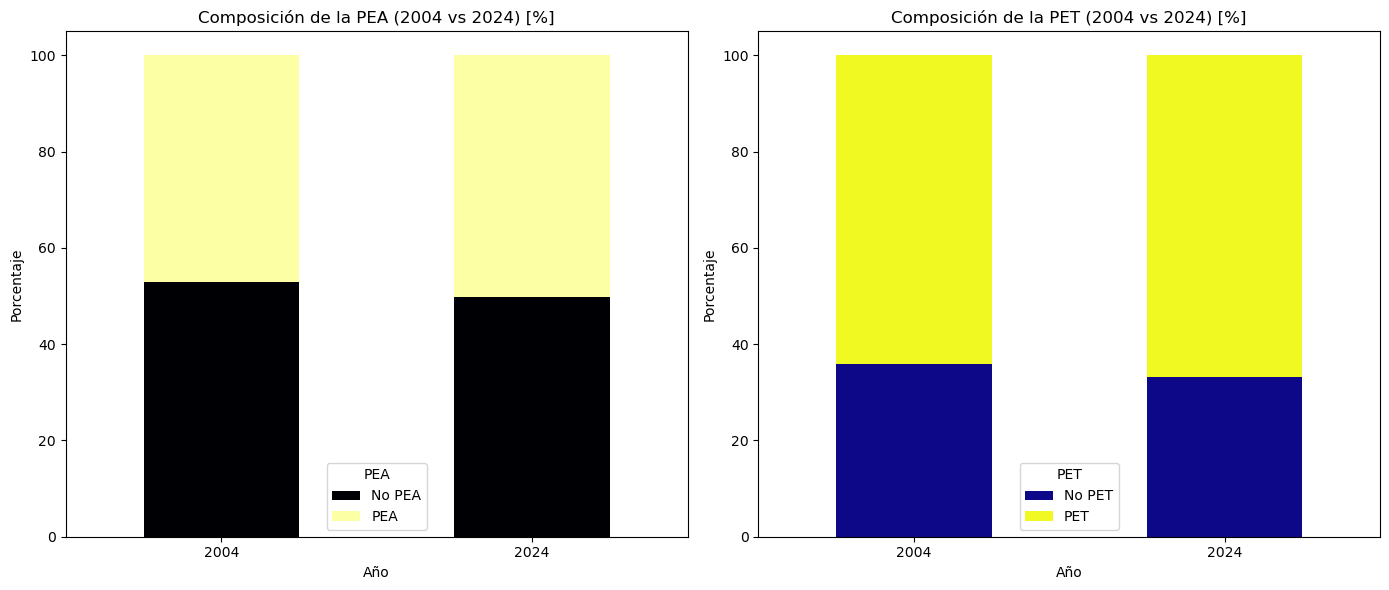

In [11]:
# Gráficos PEA y PET
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pea_percent.plot(kind="bar", stacked=True, ax=axes[0], colormap="inferno")
axes[0].set_title("Composición de la PEA (2004 vs 2024) [%]")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Porcentaje")
axes[0].legend(["No PEA", "PEA"], title="PEA")
axes[0].set_xticklabels(pea_percent.index.astype(str), rotation=0)

pet_percent.plot(kind="bar", stacked=True, ax=axes[1], colormap="plasma")
axes[1].set_title("Composición de la PET (2004 vs 2024) [%]")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("Porcentaje")
axes[1].legend(["No PET", "PET"], title="PET")
axes[1].set_xticklabels(pet_percent.index.astype(str), rotation=0)
plt.tight_layout()
plt.show()


In [12]:
# Desocupados
df_combinado["desocupado"] = df_combinado["ESTADO"].apply(lambda x: 1 if x == "Desocupado" else 0)
desocupados_por_anio = df_combinado.groupby("ANO4")["desocupado"].sum()
print("Cantidad de personas desocupadas por año:")
print(desocupados_por_anio)

Cantidad de personas desocupadas por año:
ANO4
2004    528
2024    311
Name: desocupado, dtype: int64


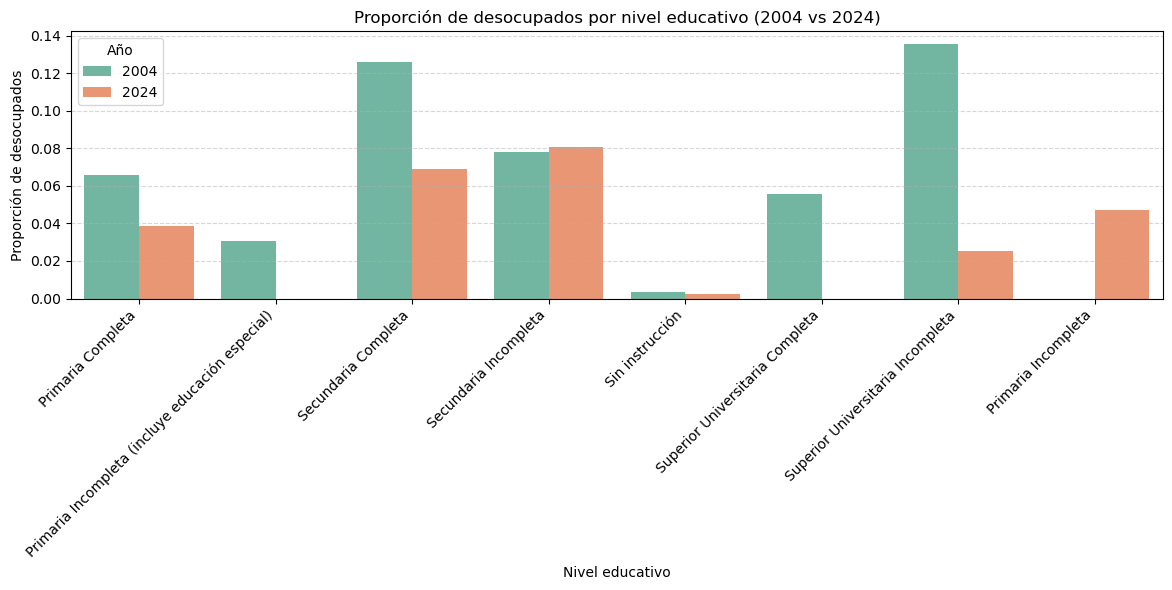

In [13]:
# Proporción por nivel educativo
nivel_ed_map = {
    1: "Sin instrucción", 2: "Primaria Incompleta", 3: "Primaria Completa",
    4: "Secundaria Incompleta", 5: "Secundaria Completa",
    6: "Superior Universitaria Incompleta", 7: "Superior Universitaria Completa"
}
df_combinado['NIVEL_ED'] = df_combinado['NIVEL_ED'].replace(nivel_ed_map)

grupo_edu = df_combinado.groupby(["ANO4", "NIVEL_ED"])
total_personas = grupo_edu.size()
total_desocupados = grupo_edu["desocupado"].sum()
proporcion_desocupados = (total_desocupados / total_personas).reset_index(name="proporcion_desocupados")

plt.figure(figsize=(12, 6))
sns.barplot(data=proporcion_desocupados, x="NIVEL_ED", y="proporcion_desocupados", hue="ANO4", palette="Set2")
plt.title("Proporción de desocupados por nivel educativo (2004 vs 2024)")
plt.ylabel("Proporción de desocupados")
plt.xlabel("Nivel educativo")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Año")
plt.tight_layout()
plt.show()

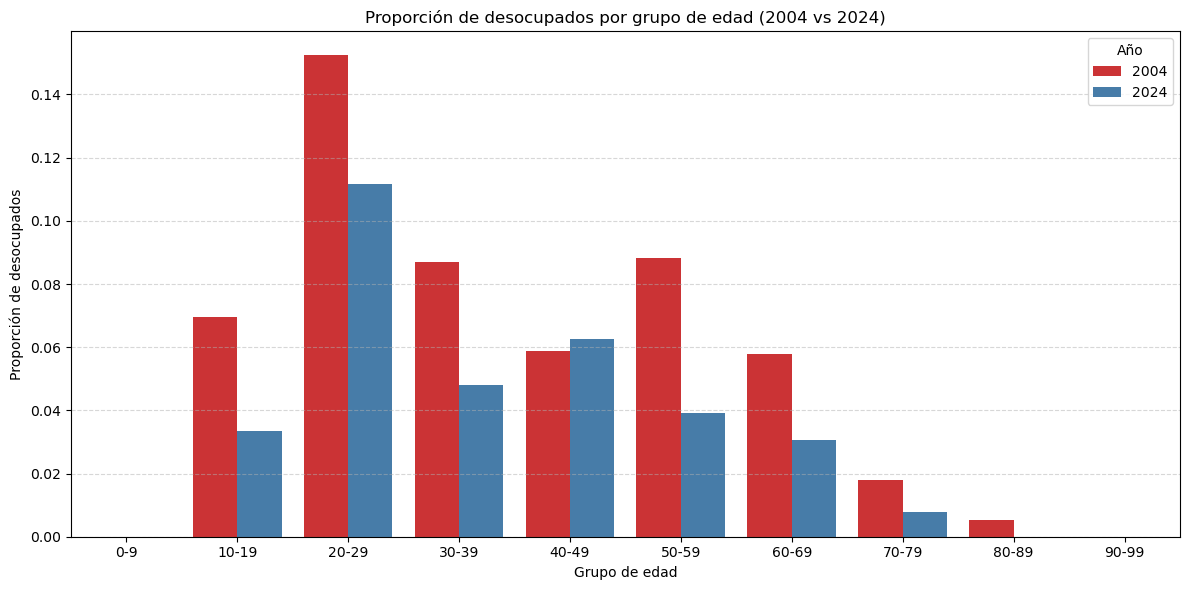

In [20]:
# Proporción por grupo de edad
df_combinado["grupo_edad"] = pd.cut(
    df_combinado["CH06"], bins=range(0, 101, 10), right=False,
    labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"]
)
grupo_edad = df_combinado.groupby(["ANO4", "grupo_edad"], observed=True)
total_personas_edad = grupo_edad.size()
total_desocupados_edad = grupo_edad["desocupado"].sum()
proporcion_edad = (total_desocupados_edad / total_personas_edad).reset_index(name="proporcion_desocupados")
proporcion_edad["ANO4"] = proporcion_edad["ANO4"].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=proporcion_edad, x="grupo_edad", y="proporcion_desocupados", hue="ANO4", palette="Set1")
plt.title("Proporción de desocupados por grupo de edad (2004 vs 2024)")
plt.xlabel("Grupo de edad")
plt.ylabel("Proporción de desocupados")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Año")
plt.tight_layout()
plt.show()

Valores únicos de CH07 en 2004: ['Viudo', 'Separado o divorciado', 'Casado', 'Soltero', 'Unido']
Categories (6, object): ['Unido' < 'Casado' < 'Separado o divorciado' < 'Viudo' < 'Soltero' < 'Ns./Nr.']
Valores únicos de CH07 en 2024: [4 2 5 3 9 1]
Valores únicos de CH07 después del mapeo: ['Viudo' 'Separado/Divorciado' 'Casado' 'Soltero' 'Unido' 'No responde']
Observaciones por año antes del filtrado: ANO4
2004    7647
2024    7051
dtype: int64
Observaciones por año después del filtrado: ANO4
2004    7647
2024    7038
dtype: int64
Proporción de desocupados por estado civil:
   ANO4          CH07_mapped  proporcion_desocupados
0  2004               Casado                0.060708
1  2004  Separado/Divorciado                0.082840
2  2004              Soltero                0.075943
3  2004                Unido                0.077954
4  2004                Viudo                0.027972
5  2024               Casado                0.027870
6  2024  Separado/Divorciado                0.07

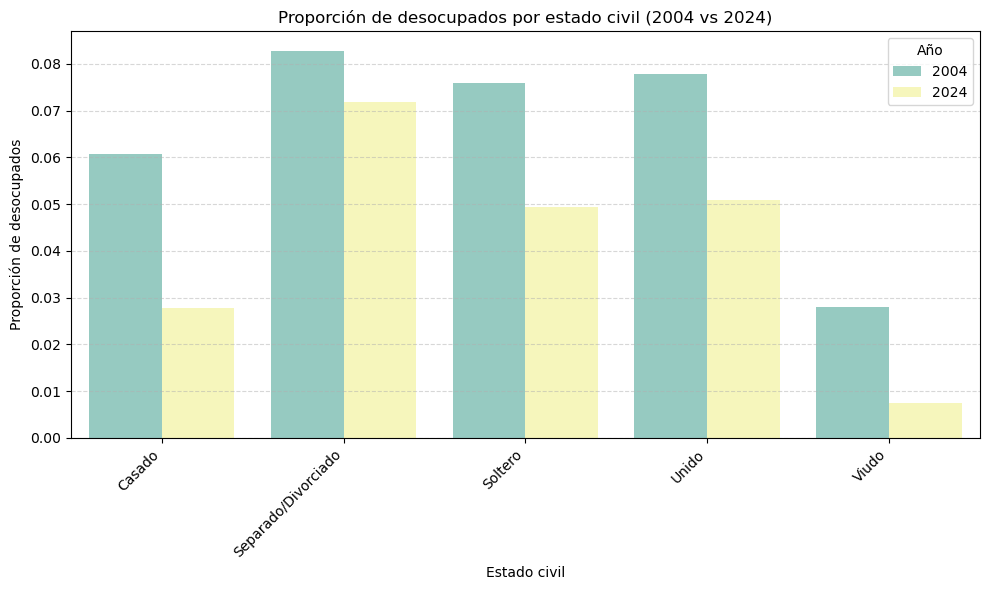


Comentario: Los solteros presentan la mayor proporción de desocupados en ambos años (aproximadamente 10% en 2004 y 7% en 2024), probablemente porque son más jóvenes y están en etapas iniciales de sus carreras. Las tasas de desempleo disminuyeron en 2024 para todas las categorías, especialmente para los solteros y separados/divorciados, lo que sugiere una mejora en la inserción laboral en Gran Buenos Aires.



In [22]:
# Variable adicional: Estado civil (CH07)
# Inspeccionamos los valores únicos de CH07 para confirmar la codificación
print("Valores únicos de CH07 en 2004:", df_2004['CH07'].unique())
print("Valores únicos de CH07 en 2024:", df_2024['CH07'].unique())

# Definimos el mapeo para CH07 según el diccionario de la EPH
ch07_map = {
    # Valores numéricos (2024)
    1: "Unido",
    2: "Casado",
    3: "Separado/Divorciado",
    4: "Viudo",
    5: "Soltero",
    9: "No responde",
    # Valores categóricos (2004)
    "Unido": "Unido",
    "Casado": "Casado",
    "Separado o divorciado": "Separado/Divorciado",
    "Viudo": "Viudo",
    "Soltero": "Soltero",
    "Ns./Nr.": "No responde"
}

# Creamos una copia de CH07 para el mapeo
# Convertimos los valores de 2024 a enteros y manejamos los valores de 2004 como strings
def map_ch07(value):
    try:
        # Intentamos convertir a entero para los valores de 2024
        value_int = int(float(value))
        return ch07_map.get(value_int, "No responde")
    except (ValueError, TypeError):
        # Si no es convertible, asumimos que es un string de 2004
        return ch07_map.get(value, "No responde")

df_combinado['CH07_mapped'] = df_combinado['CH07'].apply(map_ch07)

# Verificamos valores únicos después del mapeo
print("Valores únicos de CH07 después del mapeo:", df_combinado['CH07_mapped'].unique())

# Imprimimos el número de observaciones por año antes del filtrado
print("Observaciones por año antes del filtrado:", df_combinado.groupby("ANO4").size())

# Filtramos solo las categorías válidas de estado civil (excluimos "No responde" y nulos)
valid_states = ["Unido", "Casado", "Separado/Divorciado", "Viudo", "Soltero"]
df_combinado_estado_civil = df_combinado[df_combinado['CH07_mapped'].isin(valid_states)].copy()

# Imprimimos el número de observaciones por año después del filtrado
print("Observaciones por año después del filtrado:", df_combinado_estado_civil.groupby("ANO4").size())

# Agrupamos por año y estado civil
grupo_estado_civil = df_combinado_estado_civil.groupby(["ANO4", "CH07_mapped"])
total_personas_estado_civil = grupo_estado_civil.size()
total_desocupados_estado_civil = grupo_estado_civil["desocupado"].sum()
proporcion_estado_civil = (total_desocupados_estado_civil / total_personas_estado_civil).reset_index(name="proporcion_desocupados")

# Imprimimos el dataframe resultante para depuración
print("Proporción de desocupados por estado civil:")
print(proporcion_estado_civil)

# Convertimos ANO4 a string para graficar
proporcion_estado_civil["ANO4"] = proporcion_estado_civil["ANO4"].astype(str)

# Generamos el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=proporcion_estado_civil,
    x="CH07_mapped",
    y="proporcion_desocupados",
    hue="ANO4",
    palette="Set3"
)
plt.title("Proporción de desocupados por estado civil (2004 vs 2024)")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de desocupados")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Año")
plt.tight_layout()

# Guardamos el gráfico para el informe
plt.savefig("figura8_estado_civil.png", dpi=300, bbox_inches="tight")
plt.show()


